In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
#pd.set_option('display.max_rows', None) 

In [2]:
df=pd.read_csv('./cleaned_food.csv')


In [3]:
df.shape ## 185619 lignes et 12 colonnes


(185619, 11)

In [4]:
df.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
1,Organic Salted Nut Mix,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
2,Breadshop Honey Gone Nuts Granola,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
3,Organic Dark Chocolate Minis,2406.0,37.50,22.50,55.00,42.50,7.5,5.00,NaN,NaN,NaN
4,Organic Adzuki Beans,1393.0,1.04,NaN,62.50,NaN,12.5,22.92,NaN,NaN,NaN


In [5]:
df.isnull().sum()/len(df)

product_name               0.000000
energy_100g                0.007128
fat_100g                   0.085568
saturated-fat_100g         0.122434
carbohydrates_100g         0.087065
sugars_100g                0.065101
fiber_100g                 0.234674
proteins_100g              0.011965
salt_100g                  0.030579
sodium_100g                0.030746
nutrition-score-fr_100g    0.151073
dtype: float64

In [1]:
## vérification s'il n ya pas de valeurs négatives
 
negative_cols=[]
for col in cols:
    if len(df[df[col]<0])>0:
        negative_cols.append(col)

print('columns with negative values',negative_cols) 
## les variables ['sugars_100g', 'fiber_100g', 'proteins_100g', 'nutrition-score-fr_100g']
              ## comportent des valeurs négatives
## suppression des lignes comportant des valeurs nutritionnelles négatives
for col in negative_cols:
   
    df.drop(index=df.loc[df[col]<0,col].index,inplace=True)


NameError: name 'cols' is not defined

In [ ]:
negative_cols=[]
for col in cols:
    if len(df[df[col]<0])>0:
        negative_cols.append(col)

print('columns with negative values',negative_cols) 

In [7]:
df.isnull().sum()/len(df)

product_name               0.000000
energy_100g                0.007128
fat_100g                   0.085568
saturated-fat_100g         0.122434
carbohydrates_100g         0.087065
sugars_100g                0.065133
fiber_100g                 0.234680
proteins_100g              0.011976
salt_100g                  0.030579
sodium_100g                0.030746
nutrition-score-fr_100g    0.282013
dtype: float64

In [8]:
## imputation des valeurs nulles par IterativeImputer
impute_it=IterativeImputer(missing_values=np.nan,min_value=0)
results=impute_it.fit_transform(df[cols])
df = pd.DataFrame(data = results, 
                  index = df['product_name'], 
                  columns = cols)

In [9]:
df.isnull().sum()/len(df)

energy_100g                0.0
fat_100g                   0.0
saturated-fat_100g         0.0
carbohydrates_100g         0.0
sugars_100g                0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
sodium_100g                0.0
nutrition-score-fr_100g    0.0
dtype: float64

In [10]:
## analyse univariée
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000,185619.000000
mean,1139.603266,12.583891,4.787161,32.932562,15.911770,2.825204,7.151705,2.104165,0.828410,10.264033
std,1067.853416,19.087095,7.685074,39.061659,22.227444,13.726534,8.077863,150.304995,59.175194,7.512370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,0.200000,0.000000,7.050000,1.450000,0.000000,0.830000,0.080000,0.031496,3.544081
50%,1119.000000,6.000000,1.690000,23.180000,5.900000,1.200000,5.000000,0.630000,0.248031,9.041110
75%,1674.000000,20.000000,6.670000,58.000000,24.620000,3.600000,10.000000,1.485900,0.585000,16.000000
max,231199.000000,4293.045247,550.000000,11132.297295,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,154.222469


In [ ]:
## utiliser le zcore ou khi2 pour supprimmer les valeurs aberrantes TO-DO
## essayer de trouver une colonne

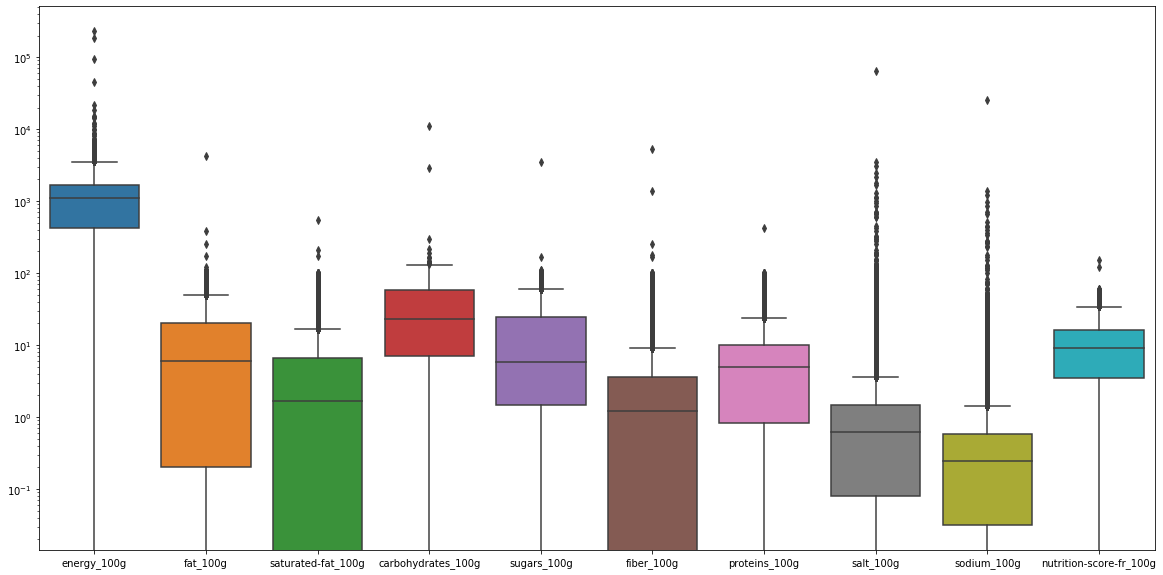

In [20]:
## boxplot
#from matplotlib import rcParams

#rcParams['figure.figsize'] = 20,10


#g = sns.barplot(x=xs, y=ys, hue=hue) 
g=sns.boxplot(data=df)
g.set_yscale("log")

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.736105,0.497123,0.629117,0.412542,0.551887,0.267419,-0.002028,-0.002028,0.519594
fat_100g,0.736105,1.000000,0.704892,0.305457,0.161316,0.557088,0.270930,-0.003120,-0.003120,0.489190
saturated-fat_100g,0.497123,0.704892,1.000000,0.094602,0.164877,0.171459,0.196125,-0.003108,-0.003108,0.654052
carbohydrates_100g,0.629117,0.305457,0.094602,1.000000,0.710613,0.679351,0.009710,0.000402,0.000402,0.283585
sugars_100g,0.412542,0.161316,0.164877,0.710613,1.000000,0.346472,-0.193248,0.000713,0.000713,0.448432
fiber_100g,0.551887,0.557088,0.171459,0.679351,0.346472,1.000000,0.168456,0.231169,0.231169,-0.000767
proteins_100g,0.267419,0.270930,0.196125,0.009710,-0.193248,0.168456,1.000000,-0.002039,-0.002039,0.182886
salt_100g,-0.002028,-0.003120,-0.003108,0.000402,0.000713,0.231169,-0.002039,1.000000,1.000000,0.005187
sodium_100g,-0.002028,-0.003120,-0.003108,0.000402,0.000713,0.231169,-0.002039,1.000000,1.000000,0.005187
nutrition-score-fr_100g,0.519594,0.489190,0.654052,0.283585,0.448432,-0.000767,0.182886,0.005187,0.005187,1.000000


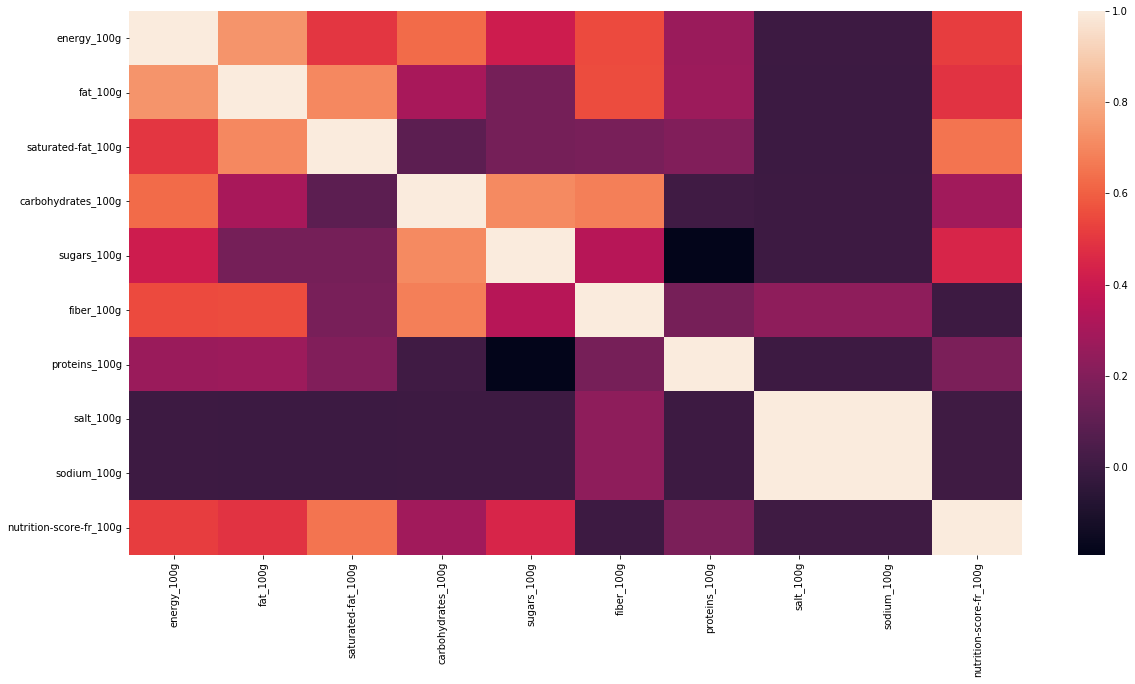

In [12]:
## matrice de corrélation
## corrélation positive parfaite entre le sodium et le sel
## forte corrélation entre le nutriscore et l'acide gras saturé (saturated-fat_100g)
sns.heatmap(df.corr())
df.corr()

In [13]:

data=df.loc[:, df.columns != 'nutrition-score-fr_100g']
data

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
product_name,,,,,,,,,
Banana Chips Sweetened (Whole),2243.0,28.570000,28.570000,64.290000,14.290000,3.6,3.57,0.000000,0.000000
Organic Salted Nut Mix,2540.0,57.140000,5.360000,17.860000,3.570000,7.1,17.86,1.224280,0.482000
Breadshop Honey Gone Nuts Granola,1933.0,18.270000,1.920000,63.460000,11.540000,7.7,13.46,2.104427,0.828515
Organic Dark Chocolate Minis,2406.0,37.500000,22.500000,55.000000,42.500000,7.5,5.00,2.105220,0.828822
Organic Adzuki Beans,1393.0,1.040000,0.000000,62.500000,17.121838,12.5,22.92,2.104521,0.828552
...,...,...,...,...,...,...,...,...,...
Test NF App,569.0,31.000000,11.468746,12.200000,9.600000,1.1,2.10,1.100000,0.433071
Amandes,2406.0,20.037716,3.730000,40.593176,3.890000,12.2,21.22,0.100000,0.039370
Thé vert Earl grey,21.0,0.200000,0.200000,0.500000,0.500000,0.2,0.50,0.025400,0.010000


In [14]:
## création d'un objet pipeline de normalisation et de l'acp
pipeline1=Pipeline([
    ('standard_scaler',StandardScaler()),
    ('pca',PCA())
])

In [15]:
## exécution du pipeline
pipeline1.fit_transform(data)

array([[ 2.10054615e+00, -5.43954594e-01, -1.09482724e+00, ...,
         1.55050760e+00,  6.24771059e-02, -1.26766509e-07],
       [ 1.65145172e+00, -3.59985304e-01, -1.99098220e+00, ...,
        -1.13275914e+00, -5.07261869e-01,  2.54059567e-08],
       [ 8.92860091e-01, -6.35498294e-02, -1.01056950e-01, ...,
         1.50836082e-01, -2.32012159e-01, -3.19024766e-11],
       ...,
       [-1.73124598e+00,  2.77211551e-01,  2.02086579e-01, ...,
        -2.21838105e-02,  1.39349577e-01, -6.77010121e-09],
       [-1.78047787e+00,  2.84844728e-01,  2.28853487e-01, ...,
        -2.07248555e-02,  1.33180993e-01, -6.61448407e-09],
       [-8.36075450e-01,  9.41211146e-02,  8.88096424e-02, ...,
        -1.41132008e-03,  9.48115440e-01,  4.82287423e-08]])

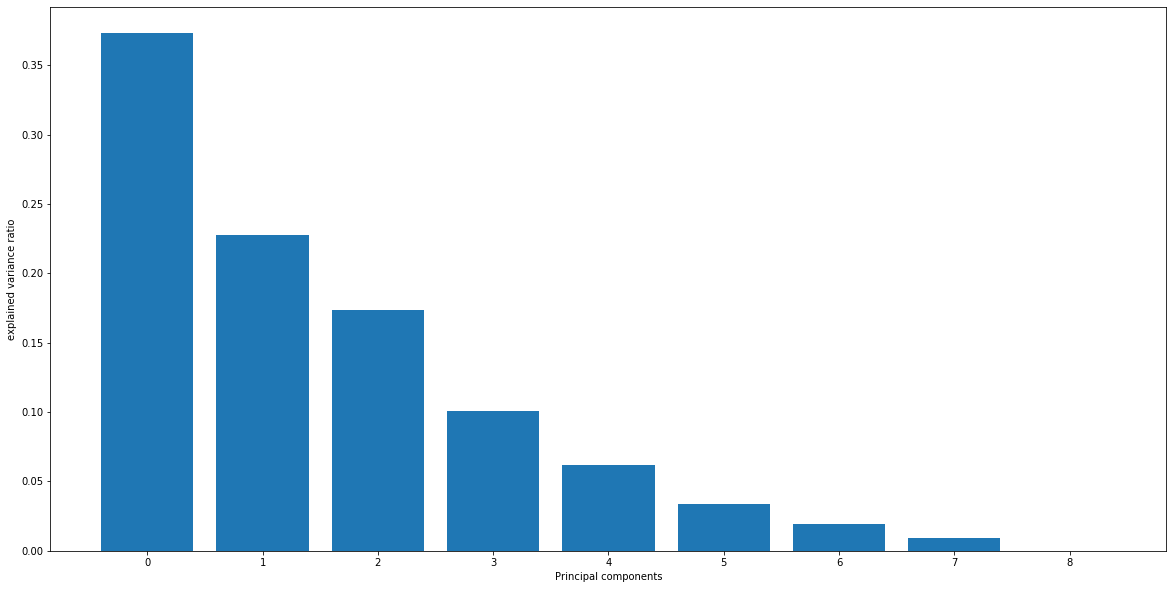

In [16]:
## visualisation des composantes principales
pca=pipeline1[1]
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_.cum)
plt.xlabel('Principal components')
plt.ylabel('explained variance ratio')

plt.xticks(range(pca.n_components_))
plt.show()

In [18]:


## la dimension intrinsèque de nos données est égale à 3
## par conséquent nos données peuvent être réduite à 3 voir 4 dimensions  au lieu de 10
## tout en gardant 70% de la variabilité
pca.explained_variance_ratio_.cumsum()

array([0.37328959, 0.6008955 , 0.7742644 , 0.87528933, 0.93743149,
       0.97143948, 0.99107864, 1.        , 1.        ])